# Import Libraries

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

import tensorflow as tf


In [147]:
# import dataset
data=pd.read_csv("/content/Churn_Modelling (1).csv")

# Data Understanding

In [148]:
# check first 5 rows
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [149]:
# see last 5 rows of dataset
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [150]:
# check number of the rows and columns
data.shape

(10000, 14)

In [151]:
# see types 
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [152]:
#check column names
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [153]:
#see unique data
data.apply(lambda x: x.nunique())

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [154]:
data[["Geography", "Tenure", "NumOfProducts", "HasCrCard", "IsActiveMember"]].apply(lambda x: x.unique())

Geography                   [France, Spain, Germany]
Tenure            [2, 1, 8, 7, 4, 6, 3, 10, 5, 9, 0]
NumOfProducts                           [1, 3, 2, 4]
HasCrCard                                     [1, 0]
IsActiveMember                                [1, 0]
dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


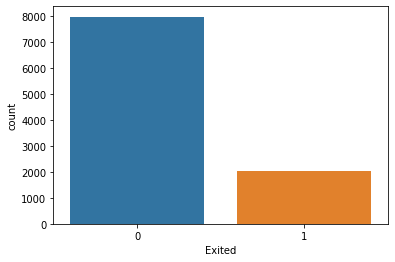

In [155]:
# check imbalance in the dataset
sns.countplot(data.Exited)

In [156]:
# check imbalance in dataset
data.Exited.value_counts(normalize=True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

In [157]:
#check null values
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [158]:
#see statistics properties
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Data Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

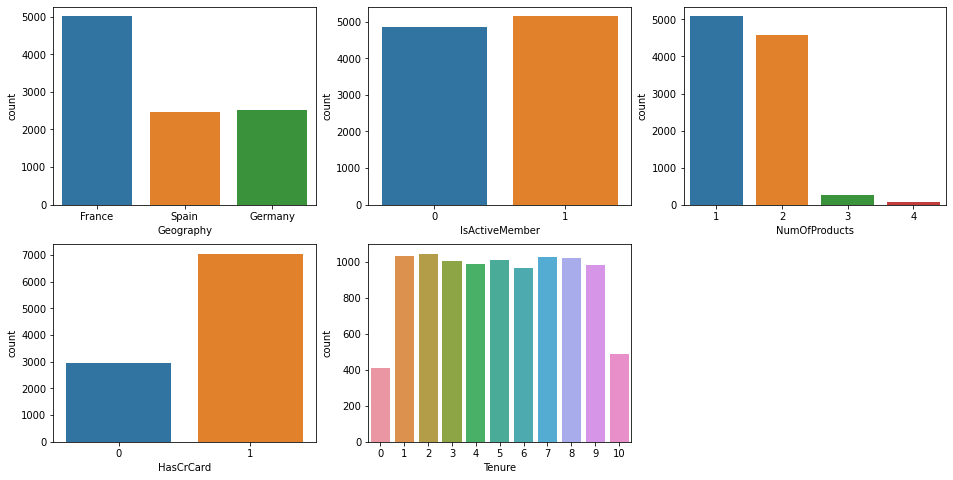

In [159]:
count={"Geography":1, "IsActiveMember":2, "NumOfProducts":3, "HasCrCard":4, "Tenure":5}

plt.figure(figsize=(16, 8))
for variable, i in count.items():
  plt.subplot(2,3, i)
  sns.countplot(data[variable])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

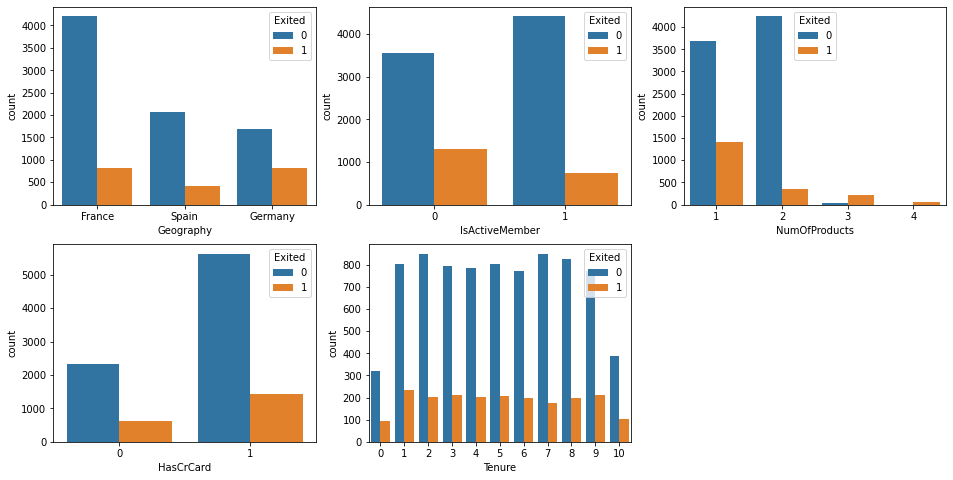

In [160]:
count={"Geography":1, "IsActiveMember":2, "NumOfProducts":3, "HasCrCard":4, "Tenure":5}

plt.figure(figsize=(16, 8))
for variable, i in count.items():
  plt.subplot(2,3, i)
  sns.countplot(data[variable], hue=data.Exited)

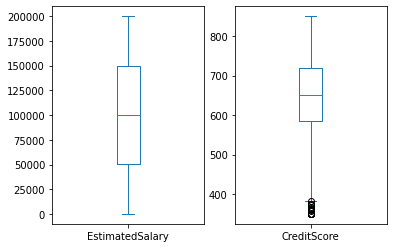

In [161]:
# check data outliers
plt.subplot(1,2, 1)
data['EstimatedSalary'].plot(kind='box')
plt.subplot(1,2, 2)
data['CreditScore'].plot(kind='box')

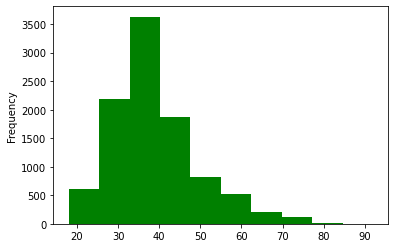

In [162]:
#check age group in dataset
data["Age"].plot(kind='hist', color='green')

# Data Preprocessing

In [163]:
# drop the columns which are not useful
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [164]:
# dummy variables
data=pd.get_dummies(data=data, columns=["Geography", "Gender"])

In [165]:
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


# Spliting

In [166]:
X=data.drop("Exited", axis=1).values
y=data.Exited.values

In [167]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y, random_state=10, test_size=0.2)

# Scaling

In [168]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Neural Network

In [169]:
# Initializing the ANN
ann = tf.keras.models.Sequential()

In [170]:
# adding input layer and first hidden layer
ann.add(tf.keras.layers.Dense(units=14, activation='relu'))

In [171]:
#adding second layer
ann.add(tf.keras.layers.Dense(units=10, activation='relu'))

In [172]:
#adding third layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [173]:
# adding output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [174]:
# compiling ANN
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [176]:
#training the ANN
model_history=ann.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 1s 4ms/step - loss: 0.5072 - accuracy: 0.7962 - val_loss: 0.4640 - val_accuracy: 0.7965
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4486 - accuracy: 0.7962 - val_loss: 0.4322 - val_accuracy: 0.7965
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4231 - accuracy: 0.8166 - val_loss: 0.4102 - val_accuracy: 0.8215
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4029 - accuracy: 0.8314 - val_loss: 0.3914 - val_accuracy: 0.8360
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3844 - accuracy: 0.8399 - val_loss: 0.3745 - val_accuracy: 0.8450
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3696 - accuracy: 0.8449 - val_loss: 0.3647 - val_accuracy: 0.8525
Epoch 7/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3595 - accuracy: 0.8549 - val_loss: 0.3541 - val_accuracy: 0.8545

## Evaluating model performance on validation set

In [178]:
# getting predictions for the validation set
prediction=(ann.predict(X_test) > 0.5).astype("int32")

63/63 [==============================] - 0s 1ms/step


In [179]:
# calculating the accuracy on validation set
accuracy_score(y_test, prediction)

0.863

In [185]:
#check confusion matrix
confusion_matrix(y_test, prediction)

array([[1516,   77],
       [ 197,  210]])

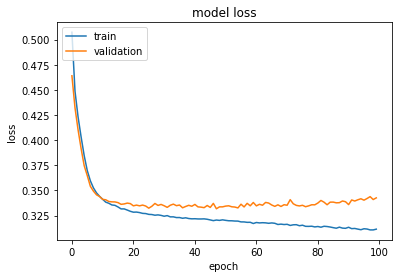

In [181]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

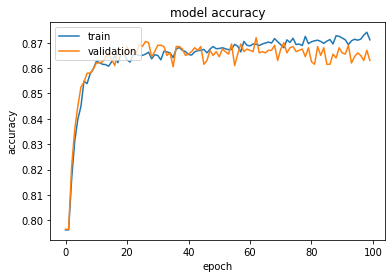

In [183]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [186]:
ann.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 14)                196       
                                                                 
 dense_9 (Dense)             (None, 10)                150       
                                                                 
 dense_10 (Dense)            (None, 6)                 66        
                                                                 
 dense_11 (Dense)            (None, 1)                 7         
                                                                 
Total params: 419
Trainable params: 419
Non-trainable params: 0
_________________________________________________________________
